In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)) )
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy}")

Epoch 1/5
938/938 [==============================] - 6s 5ms/step - loss: 0.0386 - accuracy: 0.9879 - val_loss: 0.0814 - val_accuracy: 0.9759
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0320 - accuracy: 0.9898 - val_loss: 0.0760 - val_accuracy: 0.9773
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0250 - accuracy: 0.9917 - val_loss: 0.0808 - val_accuracy: 0.9785
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0208 - accuracy: 0.9932 - val_loss: 0.0751 - val_accuracy: 0.9797
Epoch 5/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0169 - accuracy: 0.9944 - val_loss: 0.0802 - val_accuracy: 0.9791
313/313 - 1s - loss: 0.0802 - accuracy: 0.9791 - 538ms/epoch - 2ms/step
Test accuracy: 0.9790999889373779


In [ ]:
image_index = 0
image = x_test[image_index]
image = np.expand_dims(image, axis=0)
predicted_class = model.predict(image)
predicted_class = np.argmax(predicted_class)
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 115ms/step
Predicted class: 7


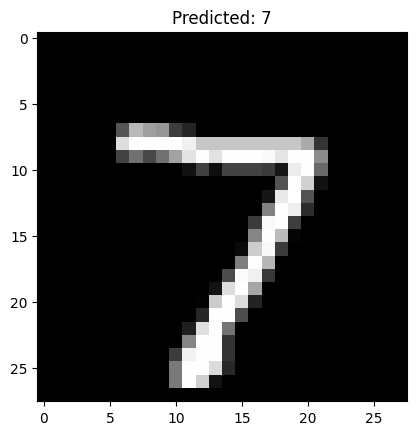

In [ ]:
plt.imshow(x_test[image_index], cmap='gray')
plt.title(f"Predicted: {predicted_class}")
plt.show()